# Calculus

This limiting procedure is at the root of both differential calculus and integral calculus. The former can tell us how to increase or decrease a function’s value by manipulating its arguments. This comes in handy for the optimization problems that we face in deep learning, where we repeatedly update our parameters in order to decrease the loss function. Optimization addresses how to fit our models to training data, and calculus is its key prerequisite. However, do not forget that our ultimate goal is to perform well on previously unseen data.
 

In [8]:
%matplotlib inline
import numpy as np
from matplotlib_inline import backend_inline
from d2l import torch as d2l

## Derivatives and Differentiation

- Put simply, a derivative is the rate of change in a function with respect to changes in its arguments.
- Derivatives can tell us how rapidly a loss function would increase or decrease were we to increase or decrease each parameter by an infinitesimally small amount
- Formally for functions $f: \mathbb{R} \rightarrow \mathbb{R}$ the derivative of f is defined as:
$$f'(x) = \lim_{h \rightarrow 0} \frac{f(x+h) - f(x)}{h}$$
- There are several equivalent notational conventions for derivatives given $y = f(x)$, the following expressions are equivalent:
$$f'(x) = y' = \frac{dy}{dx} = \frac{df}{dx} = \frac{d}{dx} f(x) = Df(x) = D_x f(x),$$
- The simbols $\frac{d}{dx}$ and $D$ are differentiation operators
- This term on the right hand side is called a limit and it tells us what happens to the value of an expression as a specified variable approaches a particular value
- This limit tells us what the ratio between a perturbation $h$ and the change in the function value $f(x + h) - f(x)$ converges to as we shrink its size to zero.
- When $f'(x)$ exists, $f$ is said to be differentiable in $x$
- When $f'(x)$ exists for all $x$ on a set we say that $f$ is differentiable on this set
- Not all functions are differentiable, including many that we wish to optimize. However, because computing the derivative of the loss is a crucial step in nearly all algorithms for training deep neural networks, we often optimize a differentiable surrogate instead.
- Functions composed from differentiable functions are often themselves differentiable.

In [13]:
f = lambda x :3*x**2-4*x

f(-2), f(-1), f(0), f(1), f(2)

(20, 7, 0, -1, 4)

- $f(x) = 3x^2 - 4x$
- $f'(x) = 6x -4$, $f'(1)=2$

In [18]:
for h in 10.0**np.arange(-1, -10, -1):
    print(f'h={h:.5f}, numerical limit={(f(1+h)-f(1))/h:.5f}')

h=0.10000, numerical limit=2.30000
h=0.01000, numerical limit=2.03000
h=0.00100, numerical limit=2.00300
h=0.00010, numerical limit=2.00030
h=0.00001, numerical limit=2.00003
h=0.00000, numerical limit=2.00000
h=0.00000, numerical limit=2.00000
h=0.00000, numerical limit=2.00000
h=0.00000, numerical limit=2.00000


## Visualization Utilities

In [9]:
def use_svg_display():  #@save
    """Use the svg format to display a plot in Jupyter."""
    backend_inline.set_matplotlib_formats('svg')

In [10]:
def set_figsize(figsize=(3.5, 2.5)):  #@save
    """Set the figure size for matplotlib."""
    use_svg_display()
    d2l.plt.rcParams['figure.figsize'] = figsize

In [11]:
#@save
def set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend):
    """Set the axes for matplotlib."""
    axes.set_xlabel(xlabel), axes.set_ylabel(ylabel)
    axes.set_xscale(xscale), axes.set_yscale(yscale)
    axes.set_xlim(xlim),     axes.set_ylim(ylim)
    if legend:
        axes.legend(legend)
    axes.grid()

In [12]:
#@save
def plot(X, Y=None, xlabel=None, ylabel=None, legend=[], xlim=None,
         ylim=None, xscale='linear', yscale='linear',
         fmts=('-', 'm--', 'g-.', 'r:'), figsize=(3.5, 2.5), axes=None):
    """Plot data points."""

    def has_one_axis(X):  # True if X (tensor or list) has 1 axis
        return (hasattr(X, "ndim") and X.ndim == 1 or isinstance(X, list)
                and not hasattr(X[0], "__len__"))

    if has_one_axis(X): X = [X]
    if Y is None:
        X, Y = [[]] * len(X), X
    elif has_one_axis(Y):
        Y = [Y]
    if len(X) != len(Y):
        X = X * len(Y)

    set_figsize(figsize)
    if axes is None:
        axes = d2l.plt.gca()
    axes.cla()
    for x, y, fmt in zip(X, Y, fmts):
        axes.plot(x,y,fmt) if len(x) else axes.plot(y,fmt)
    set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend)

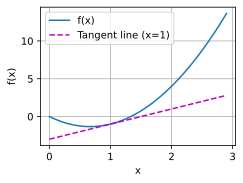

In [23]:
x = np.arange(0, 3, 0.1)
plot(x, [f(x), 2 * x - 3], 'x', 'f(x)', legend=['f(x)', 'Tangent line (x=1)'])

## Partial Derivatives

- Derivatives that apply to multivariate functions
- Let $y = f(x_1, x_2, \ldots, x_n)$ be a function with n variables, the partial derivative with respect of the $i^{th}$ parameter $x_i$ is:
$$\frac{\partial y}{\partial x_i} = \lim_{h \rightarrow 0} \frac{f(x_1, \ldots, x_{i-1}, x_i+h, x_{i+1}, \ldots, x_n) - f(x_1, \ldots, x_i, \ldots, x_n)}{h}.$$
$$ \frac{\partial y}{\partial x_i} = \frac{\partial f}{\partial x_i} = \partial_{x_i} f = \partial_i f = f_{x_i} = f_i = D_i f = D_{x_i} f.$$ 
- We threat $x_1, \ldots, x_{i-1}, x_{i+1}, \ldots, x_n$ as constants and calculate the derivative of $y$ with respect to $x_i$

## Gradient

- We can concatenate partial derivatives of a multivariate function with respect to all its variables to obtain a vector that is called the gradient of the function.
- Suppose $f: \mathbb{R}^n \rightarrow \mathbb{R}$ whit an input $\mathbf{x} = [x_1, x_2, \ldots, x_n]^\top$ and the output is a scalar. The gradient of the function $f$ is a vector of $n$ partial derivatives:
$$\nabla_{\mathbf{x}} f(\mathbf{x}) = \left[\partial_{x_1} f(\mathbf{x}), \partial_{x_2} f(\mathbf{x}), \ldots
\partial_{x_n} f(\mathbf{x})\right]^\top$$
-  The following rules come in handy for differentiating multivariate function:
    - For all $A \in \Bbb{R}^{m\times n}$:
        - $\nabla_{\mathbf{x}} \mathbf{A} \mathbf{x} = \mathbf{A}^\top$
        - $\nabla_{\mathbf{x}} \mathbf{x}^\top \mathbf{A} = \mathbf{A}$
    - For square matrices $A \in \Bbb{R}^{n\times n}$:
        - $\nabla_{\mathbf{x}} \mathbf{x}^\top \mathbf{A} \mathbf{x} = (\mathbf{A} + \mathbf{A}^\top)\mathbf{x}$
        - $\nabla_{\mathbf{x}} \|\mathbf{x} \|^2 = \nabla_{\mathbf{x}} \mathbf{x}^\top \mathbf{x} = 2\mathbf{x}$
    - For any matrix $X$
        - $\nabla_{\mathbf{X}} \|\mathbf{X} \|_\textrm{F}^2 = 2\mathbf{X}$
-  gradients allow us to determine how to move the parameters of a model in order to lower the loss, and each step of the optimization algorithms us

## Chain Rules

- In deep learning, the gradients of concern are often difficult to calculate because we are working with deeply nested functions (of functions (of functions…)).Fortunately, the chain rule takes care of this.
- Suppose $y = f(g(x))$ and that the underlying function $y=f(u)$ and $u=g(x)$ are both differentiable,the chain rule states:
$$\frac{dy}{dx} = \frac{dy}{du} \frac{du}{dx}.$$
- Considering multivariate functions, $y = f(\mathbf{u})$ has variables $u_1, u_2, \ldots, u_m$ where each $u_i = g_i(\mathbf{x})$ has variables $x_1, x_2, \ldots, x_n$ then:
$$\frac{\partial y}{\partial x_{i}} = \frac{\partial y}{\partial u_{1}} \frac{\partial u_{1}}{\partial x_{i}} + \frac{\partial y}{\partial u_{2}} \frac{\partial u_{2}}{\partial x_{i}} + \ldots + \frac{\partial y}{\partial u_{m}} \frac{\partial u_{m}}{\partial x_{i}} \ \textrm{ and so } \ \nabla_{\mathbf{x}} y =  \mathbf{A} \nabla_{\mathbf{u}} y,$$
- where $\mathbf{A} \in \mathbb{R}^{n \times m}$ is a matrix that contains the derivative of vector $\mathbf{u}$ respect the vector $\mathbf{x}$, thus evaluating the gradient requires computing a vector-matrix product
- The composition rules for differentiation can be applied routinely, enabling us to compute gradients automatically.
- Computing the derivatives of vector-valued functions requires us to multiply matrices as we trace the dependency graph of variables from output to input. In particular, this graph is traversed in a forward direction when we evaluate a function and in a backwards direction when we compute gradients
- Backpropagation is a computational procedure for applying the chain rule

## Excercises

### 1

1. $f(x)=c \rightarrow f'(x) = \lim_{h \rightarrow 0} \frac{c - c}{h} = 0 $

2. $f(x)=x^n \rightarrow f'(x) = \lim_{h \rightarrow 0} \frac{(x+h)^n - x^n}{h} = \lim_{h \rightarrow 0} \frac{x^n + nhx^{n-1} + h^2P(x,h) - x^n}{h} = nx^{n-1}$

3. $f(x)=e^x \rightarrow f'(x) = \lim_{h \rightarrow 0} \frac{e^{(x+h)} - e^x}{h} $  
    
    using the definition
    $\mathrm e^x=\lim_{n\to\infty}\left(1+\frac xn\right)^n$

    $\begin{aligned}
    \frac{\mathrm d}{\mathrm dx}\mathrm e^x
    &= \lim_{h\to 0}\frac{\mathrm e^{x+h}-\mathrm e^x}{h}\\
    &= \lim_{h\to 0}\frac{\lim\limits_{n\to\infty}\left(1+\frac{x+h}n\right)^n - \lim\limits_{n\to\infty}\left(1+\frac xn\right)^n}{h}\\
    &= \lim_{h\to 0}\lim_{n\to\infty}\frac{\left(1+\frac{x+h}n\right)^n - \left(1+\frac xn\right)^n}{h}
    \end{aligned}$
    
    Now  
    $\left(1+\frac{x+h}{n}\right)^n = \sum_{k=0}^n{n\choose k}\left(\frac{h}{n}\right)^k\left(1+\frac{x}{n}\right)^{n-k}$

    and therefore

    $\begin{aligned}
\frac{\mathrm d}{\mathrm dx}\mathrm e^x
&= \lim_{h\to 0}\lim_{n\to\infty}\sum_{k=1}^n{n\choose k}\frac{h^{k-1}}{n^k}\left(1+\frac{x}{n}\right)^{n-k}\\
&= \lim_{h\to 0}\left(\lim_{n\to\infty}{n\choose 1}\frac{1}{n}\left(1+\frac{x}{n}\right)^{n-1}+h\lim_{n\to\infty}\sum_{k=2}^n{n\choose k}\frac{h^{k-2}}{n^k}\left(1+\frac{x}{n}\right)^{n-k}\right)\\
&= \lim_{n\to\infty}{n\choose 1}\frac{1}{n}\left(1+\frac{x}{n}\right)^{n-1}+\lim_{h\to 0}h\lim_{n\to\infty}\sum_{k=2}^n{n\choose k}\frac{h^{k-2}}{n^k}\left(1+\frac{x}{n}\right)^{n-k}\\
&= \lim_{n\to\infty}\left(1+\frac{x}{n}\right)^{n-1}\\
&= \lim_{n\to\infty}\frac{\left(1+\frac{x}{n}\right)^{n}}{1+\frac{x}{n}} = \frac{e^x}{1} = e^x\\
\end{aligned}$

4. $f(x)=e^x \rightarrow f'(x) = \lim_{h \rightarrow 0} \frac{\log(x+h) - \log x}{h} $
    
    using the definition
    $\mathrm e^x=\lim_{h\to 0}\left(1+hx\right)^{\frac 1h}$
    
    $\frac{\mathrm d}{\mathrm dx}\mathrm \log x = \lim_{h \rightarrow 0} [\frac 1h \frac{\log(x+h)}{log x}]
    = \lim_{h \rightarrow 0} [\frac 1h \log(1 + \frac hx)] = \lim_{h \rightarrow 0} \log(1 + \frac hx)^{\frac 1h} = \log (e^{\frac 1x}) = \frac 1x $

### 2

- Sum Rule:  
    
    $u(x) = f(x) + g(x)$

    $u'(x) = \lim_{h \rightarrow 0} \frac{f(x+h)+g(x+h)-f(x)+g(x)}{h} = \lim_{h \rightarrow 0} \frac{f(x+h)-f(x)}{h} + \lim_{h \rightarrow 0} \frac{g(x+h)-g(x)}{h} = f'(x) + g'(x)$

- Product Rule:

    $u(x) = f(x)g(x)$

    $u'(x) = \lim_{h \rightarrow 0} \frac{f(x+h)g(x+h)-f(x)g(x)}{h} =$ 

    $\lim_{h \rightarrow 0} \frac{f(x+h)g(x+h) - f(x+h)g(x) + f(x+h)g(x)-f(x)g(x)}{h} =$

    $\lim_{h \rightarrow 0} f(x+h)(\frac{g(x+h)-g(x)}{h}) + (\frac{f(x+h)-f(x)}{h})g(x) = f(x)g'(x) + f'(x)g(x) $

- Quotient Rule

    $u(x) = \frac{f(x)}{g(x)}$

    $u'(x) = \lim_{h \rightarrow 0} \frac{\frac{f(x+h)}{g(x+h)}-\frac{f(x)}{g(x)}}{h} =$
    
    $\lim_{h \rightarrow 0} \frac{\frac{f(x+h)g(x)-f(x)g(x+h)}{g(x+h)g(x)}}{h} = $

    $\lim_{h \rightarrow 0} \frac{\frac{f(x+h)g(x) - f(x)g(x) + f(x)g(x) -f(x)g(x+h)}{g(x+h)g(x)}}{h} = \lim_{h \rightarrow 0} \frac{f(x+h)-f(x)}{h}\frac{g(x)}{g(x)g(x+h)} - \frac{f(x)}{g(x)g(x+h)} \frac{g(x+h)-g(x)}{h} = \frac{f'(x)g(x)-f(x)g'(x)}{g^2(x)}$ 

     

### 3

$u(x) = f(x)g(x)$

$g(x) = c$

$u'(x) = \lim_{h \rightarrow 0} \frac{f(x+h)c-f(x)c}{h} = c \lim_{h \rightarrow 0} \frac{f(x+h) - f(x)}{h} = cf'(x)$

Otherwise

$u'(x) = f(x)g'(x) + f'(x)g(x) = 0 + f'(x)c = cf'(x)$

### 4

$f(x) = x^x = e^{x\ln(x)}$

$f'(x) = \frac{d}{dx} e^{x\ln(x)}$

$u={x\ln(x)}$

$f'(x) = \frac{d}{du}e^u \frac{du}{dx} = e^u \frac{du}{dx} $

$f'(x) = e^{x\ln(x)} \frac{d}{dx} x\ln(x) = x^x (\ln(x) + 1) = x^x\ln(x) + x^x $



### 5

- It means that the function has no rate of change even though its arguments have changed.
- $f(x) = c$ for every $x \in \Bbb{R}$

### 6

In [16]:
import numpy as np

f = lambda x : x**3 -1/x
x = np.arange(0, 3, 0.1)

$f(x) = x^3 - \frac 1x$

$f'(x) = 3x^2 + \frac {1}{x^2}$

$f'(1) = 4$ slope of the tangent line

The curve pass for the point (1,0) so:

$ r: 4(x-1) = 4x-4$

C:\Users\teoas\AppData\Local\Temp\ipykernel_24776\3505477457.py:3: RuntimeWarning: divide by zero encountered in divide
  f = lambda x : x**3 -1/x


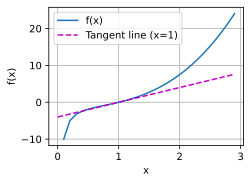

In [15]:
plot(x, [f(x), 4*x-4 ], 'x', 'f(x)', legend=['f(x)', 'Tangent line (x=1)'])

C:\Users\teoas\AppData\Local\Temp\ipykernel_24776\1058951297.py:1: RuntimeWarning: divide by zero encountered in divide
  f  = lambda x : x ** 3 - 1.0 / x


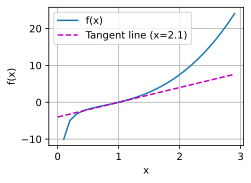

In [20]:
f  = lambda x : x ** 3 - 1.0 / x

df = lambda x : 3 * x ** 2 + 1/(x**2)

def tangentLine(x, x0):
    """x is the input list, x0 is the point we compute the tangent line"""
    y0 = f(x0)
    a = df(x0)
    b = y0 - a * x0
    return a * x + b

x = np.arange(0, 3, 0.1)
plot(x, [f(x), tangentLine(x, 1)], 'x', 'f(x)', legend=['f(x)', 'Tangent line (x=2.1)'])

### 7

$f(\mathbf{x}) = 3x_1^2 + 5e^{x_2}$

$\frac{\partial f}{\partial x_1} = 6x$

$\frac{\partial f}{\partial x_2} = 5e^{x_2}$

$\nabla f(\mathbf{x}) = [6x, 5e^{x_2}]$ 


<Figure size 640x480 with 0 Axes>

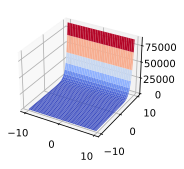

In [42]:
from matplotlib import cm
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np

figure(figsize=(8,6), dpi=80)
fig, ax = plt.subplots(subplot_kw={"projection":"3d"})

X_1 = np.arange(-10,10,0.25)
X_2 = np.arange(-10,10,0.25)

X_1,X_2 = np.meshgrid(X_1,X_2)

R = 6*X_1 + 5*np.exp(X_2)
f = 3*X_2**2 + 5*np.exp(X_2)

ax.plot_surface(X_1,X_2,R, cmap=cm.coolwarm)
#ax.plot_surface(X_1, X_2, f)

### 8

$f(\mathbf{x}) = \|\mathbf{x}\|_2 = \sqrt{x_1^2 + x_2^2 + x_3^2 + \dots + x_n^2 } $

$\frac{\partial f}{\partial x_{i}} = $